<font size=12><b> Bank Loan Prediction  </font>

<font size=3><b> Business Problem: I have always wanted to understand and know which age groups are more likely to repay loans, and perhaps identify the creditworthiness of potential customers.   

<font size=3><b>Objective: (Classification problem) To predict 'loan status' based on attributes such as age, education, and gender

<font size=3><b>Limitation: Data-set is not fully refined. Education should be categorised as either high school, college, or work. Instead we have bachelor and college? 

<font size=3><b>Info: PAIDOFF=2, collection = 0, collection_paidoff= 1 

 

In [237]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

In [238]:
#Read file
loan=pd.read_csv('loan payments data.csv')

In [239]:
# Check first 800 rows
loan.head(10)

Loan_ID loan_status  Principal  terms effective_date   due_date  \
0  xqd20166231     PAIDOFF       1000     30       9/8/2016  10/7/2016   
1  xqd20168902     PAIDOFF       1000     30       9/8/2016  10/7/2016   
2  xqd20160003     PAIDOFF       1000     30       9/8/2016  10/7/2016   
3  xqd20160004     PAIDOFF       1000     15       9/8/2016  9/22/2016   
4  xqd20160005     PAIDOFF       1000     30       9/9/2016  10/8/2016   
5  xqd20160706     PAIDOFF        300      7       9/9/2016  9/15/2016   
6  xqd20160007     PAIDOFF       1000     30       9/9/2016  10/8/2016   
7  xqd20160008     PAIDOFF       1000     30       9/9/2016  10/8/2016   
8  xqd20160909     PAIDOFF       1000     30       9/9/2016  10/8/2016   
9  xqd20160010     PAIDOFF        800     15      9/10/2016  9/24/2016   

     paid_off_time  past_due_days  age             education  Gender  
0  9/14/2016 19:31            NaN   45  High School or Below    male  
1   10/7/2016 9:00            NaN   50              Bechalor  female  
2  9/25/2016 16:58            NaN   33              Bechalor  female  
3  9/22/2016 20:00            NaN   27               college    male  
4  9/23/2016 21:36            NaN   28               college  female  
5   9/9/2016 13:45            NaN   35       Master or Above    male  
6  10/7/2016 23:07            NaN   29               college    male  
7  10/5/2016 20:33            NaN   36               college    male  
8  10/8/2016 16:00            NaN   28               college    male  
9  9/24/2016 13:00            NaN   26               college    male

In [240]:
# Number of rows and columns respectively
loan.shape

(500, 11)

In [241]:
# Check data types
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     400 non-null object
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [242]:
# Check for null-values
loan.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [243]:
# Check null values for column 'paid_off_time'
# These are days; may just drop it

loan.paid_off_time.isnull().sum() 

100

In [244]:
#column is completely empty; just drop it later.
loan.past_due_days.isnull().sum()


300

In [245]:
# Show important statistics about the data.
loan.describe()

# We can see that on average customers in their 31s tend to borrow a total of $943 for 23 periods. 

Principal       terms  past_due_days         age
count   500.000000  500.000000      200.00000  500.000000
mean    943.200000   22.824000       36.01000   31.116000
std     115.240274    8.000064       29.38088    6.084784
min     300.000000    7.000000        1.00000   18.000000
25%    1000.000000   15.000000        3.00000   27.000000
50%    1000.000000   30.000000       37.00000   30.000000
75%    1000.000000   30.000000       60.00000   35.000000
max    1000.000000   30.000000       76.00000   51.000000

<font size=12><b> Visualisations </font>

In [246]:
loan.corr()

Principal     terms  past_due_days       age
Principal       1.000000  0.534302      -0.093139 -0.092613
terms           0.534302  1.000000      -0.102613 -0.074259
past_due_days  -0.093139 -0.102613       1.000000 -0.053849
age            -0.092613 -0.074259      -0.053849  1.000000

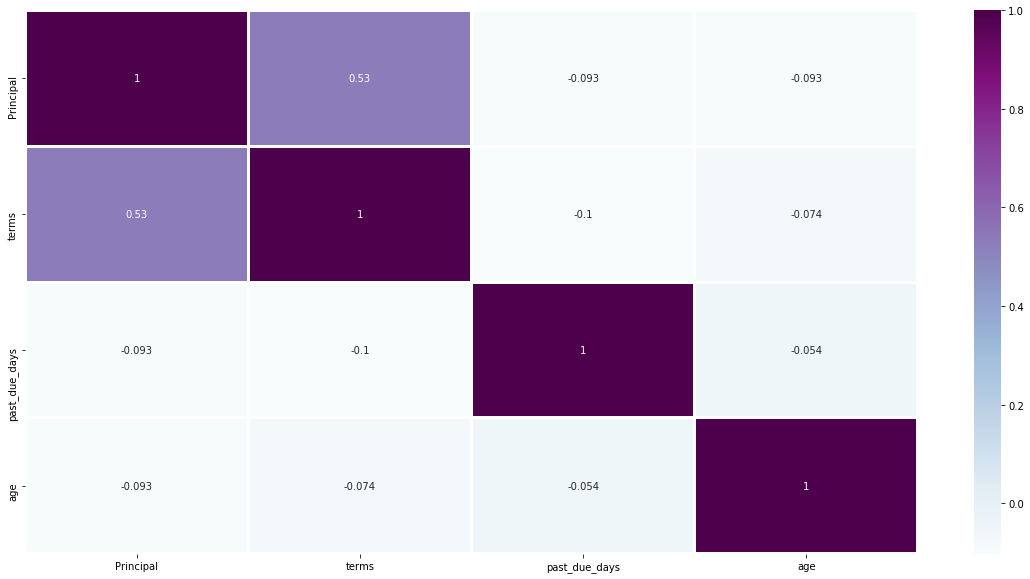

In [247]:
# Show correlation on heatmap for easier visualisation
plot=plt.subplots(1, figsize=(20,10))
sns.heatmap(loan.corr(), annot=True, cmap='BuPu', linewidth=2)
plt.show()

# A value of 1 means strong correlation. Strong correlation between terms and principal.

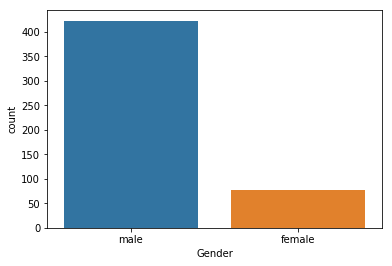

In [248]:
#Number of male and female?
sns.countplot(x= 'Gender', data=loan)

male      0.846
female    0.154
Name: Gender, dtype: float64


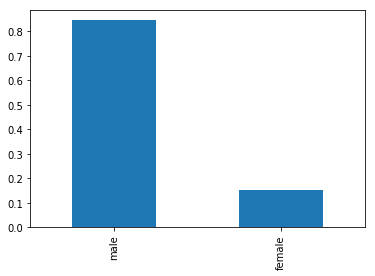

In [249]:
#Plot percentage
print(loan.Gender.value_counts(normalize=True))
loan.Gender.value_counts(normalize=True).plot(kind='bar')

# 84% of customers are male, 

In [250]:
#Check for number of college, bachelor,?
loan.groupby(['Gender', 'education'])['loan_status'].count()

Gender  education           
female  Bechalor                 13
        High School or Below     31
        college                  33
male    Bechalor                 54
        High School or Below    178
        Master or Above           4
        college                 187
Name: loan_status, dtype: int64

In [251]:
# Group and plot
loan.groupby(['Gender', 'education'])['loan_status'].count().plot(kind='bar')

In [252]:
sns.boxplot(x='Gender', y='age', data=loan)

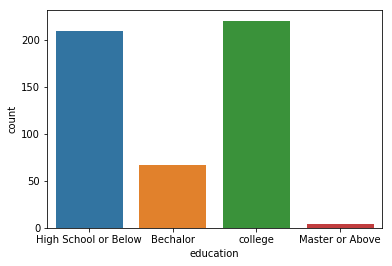

In [253]:
#Do a seaborn count for each category of education
sns.countplot(x = 'education', data=loan)

In [254]:
#Do a count for loan-status column
sns.countplot(x= 'loan_status', data=loan)

In [255]:
#Visualisation end. Start encoding after visualisation

<font size=12><b> Data Preprocessing </font>

In [256]:
#Encode categorical data with numerical ones

loan['Gender']=loan.Gender.map({ 'male':1, 'female':0 })

In [257]:
loan.head(5)

Loan_ID loan_status  Principal  terms effective_date   due_date  \
0  xqd20166231     PAIDOFF       1000     30       9/8/2016  10/7/2016   
1  xqd20168902     PAIDOFF       1000     30       9/8/2016  10/7/2016   
2  xqd20160003     PAIDOFF       1000     30       9/8/2016  10/7/2016   
3  xqd20160004     PAIDOFF       1000     15       9/8/2016  9/22/2016   
4  xqd20160005     PAIDOFF       1000     30       9/9/2016  10/8/2016   

     paid_off_time  past_due_days  age             education  Gender  
0  9/14/2016 19:31            NaN   45  High School or Below       1  
1   10/7/2016 9:00            NaN   50              Bechalor       0  
2  9/25/2016 16:58            NaN   33              Bechalor       0  
3  9/22/2016 20:00            NaN   27               college       1  
4  9/23/2016 21:36            NaN   28               college       0

In [258]:
# We could also use this method, but it creates un-necessary columns. Let's just put it here incase.
#loan=pd.get_dummies(loan)

In [259]:
# Returns 

loan.Principal.unique()

array([1000,  300,  800,  900,  700,  500], dtype=int64)

In [260]:
#Encode other catgeorical data automatically
from sklearn import preprocessing

In [261]:
le= preprocessing.LabelEncoder()

In [262]:
#We encode these. Gender already been numerically encoded using a different method
loan['loan_status']= le.fit_transform(loan['loan_status'])
loan['education']= le.fit_transform(loan['education'])

loan.head()


Loan_ID  loan_status  Principal  terms effective_date   due_date  \
0  xqd20166231            2       1000     30       9/8/2016  10/7/2016   
1  xqd20168902            2       1000     30       9/8/2016  10/7/2016   
2  xqd20160003            2       1000     30       9/8/2016  10/7/2016   
3  xqd20160004            2       1000     15       9/8/2016  9/22/2016   
4  xqd20160005            2       1000     30       9/9/2016  10/8/2016   

     paid_off_time  past_due_days  age  education  Gender  
0  9/14/2016 19:31            NaN   45          1       1  
1   10/7/2016 9:00            NaN   50          0       0  
2  9/25/2016 16:58            NaN   33          0       0  
3  9/22/2016 20:00            NaN   27          3       1  
4  9/23/2016 21:36            NaN   28          3       0

In [263]:
# past due days: dont transform fit that with random numbers... since there are no values, just fill it with 0.
loan['past_due_days']= loan['past_due_days'].fillna(0).astype(int)

In [264]:
# Convert to date time object
loan['effective_date']= pd.to_datetime(loan['effective_date'])
loan['due_date']= pd.to_datetime(loan['due_date'])
loan['paid_off_time']=pd.to_datetime(loan['paid_off_time'])

In [265]:
loan.head()

Loan_ID  loan_status  Principal  terms effective_date   due_date  \
0  xqd20166231            2       1000     30     2016-09-08 2016-10-07   
1  xqd20168902            2       1000     30     2016-09-08 2016-10-07   
2  xqd20160003            2       1000     30     2016-09-08 2016-10-07   
3  xqd20160004            2       1000     15     2016-09-08 2016-09-22   
4  xqd20160005            2       1000     30     2016-09-09 2016-10-08   

        paid_off_time  past_due_days  age  education  Gender  
0 2016-09-14 19:31:00              0   45          1       1  
1 2016-10-07 09:00:00              0   50          0       0  
2 2016-09-25 16:58:00              0   33          0       0  
3 2016-09-22 20:00:00              0   27          3       1  
4 2016-09-23 21:36:00              0   28          3       0

In [266]:
loan.shape

(500, 11)

In [267]:
#Data visualisation and pre-processing

In [268]:
# How many people have paid?
loan['loan_status'].value_counts()

2    300
1    100
0    100
Name: loan_status, dtype: int64

In [269]:
#Must store it in variable for it to take effect
loan=loan.drop(columns=['paid_off_time', 'effective_date', 'due_date', 'Loan_ID'])
loan.head(5)

loan_status  Principal  terms  past_due_days  age  education  Gender
0            2       1000     30              0   45          1       1
1            2       1000     30              0   50          0       0
2            2       1000     30              0   33          0       0
3            2       1000     15              0   27          3       1
4            2       1000     30              0   28          3       0

In [270]:
x= loan.drop(['loan_status'], axis=1)
y= loan['loan_status']

<font size=12><b> Split data </font>

In [271]:
# split the dataset into both training and test set
from sklearn.model_selection import train_test_split

In [272]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42 )

In [273]:
# Print shapes for split data-set to ensure all rows and columns are working properly
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(400, 6)
(400,)
(100, 6)
(100,)


<font size=12><b> Normalize data </font>

In [274]:
# Scale training data-set only.
# Normalize only after splitting data-set
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train) 
x_test=sc.transform(x_test)


<font size=12><b> Logistic Regression Model </font>

In [275]:
# Import model
from sklearn.linear_model import LogisticRegression

In [276]:
# Define the model, and call it
lr=LogisticRegression()

In [277]:
#Train the model on the training set
lr.fit(x_train,y_train)

C:\Users\User\Anaconda3\envs\cv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\envs\cv\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [278]:
# After training use the model and predict it on the unseen test set.
y_pred1=lr.predict(x_test)
y_pred1

array([0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2])

In [279]:
# Outpute accuracy score: training-set
lr.score(x_train,y_train)

0.8025

In [280]:
# Outpute accuracy score: testing-set
lr.score(x_test,y_test)

0.76

<b>Discussion:  If normalization is applied on the training set(x) before split, the Logistic Regression model yields an R-square of 96%, which indicates that 96% of the variation in Y (Loan_Status) can be explained by the variation in X. However Element(2018) highlights a common misconception is performing normalization before dataset split, as it will evaluate both the mean and standard deviation of both training and the test data. This introduces information on the test data, which results in optimistic results. Thus it is often better to split data set first, and perform scaling during the training and scoring phase based on the training set.  
If normalization is only applied to x_train and after the split, the model gives an accuracy score of 75% or so.
    
    
Similarly, on the unseen test data, only 94% can be explained. Accuracy score is quite high, and log model is quite proficient and 94% accurate in predicting whether the loan will be paid or not. Of-course it is better to evaluate the effectiveness of other algorithms. 
    

<font size=12><b> Random Forest Regressor </font>

In [281]:
from sklearn.ensemble import RandomForestRegressor

In [282]:
rfr=RandomForestRegressor()

In [283]:
rfr.fit(x_train,y_train)
rfr.predict(x_test)

C:\Users\User\Anaconda3\envs\cv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0. , 2. , 0. , 2. , 2. , 0. , 0. , 2. , 2. , 1. , 2. , 2. , 1. ,
       2. , 0. , 0. , 1. , 2. , 0. , 0.5, 1. , 0.2, 2. , 0. , 2. , 1. ,
       1. , 2. , 2. , 0. , 0.5, 0. , 1. , 2. , 2. , 0. , 1. , 2. , 2. ,
       2. , 0. , 2. , 1. , 2. , 2. , 2. , 2. , 2. , 1. , 2. , 2. , 2. ,
       2. , 1. , 2. , 2. , 2. , 2. , 2. , 2. , 1. , 2. , 0. , 1. , 2. ,
       2. , 1. , 2. , 2. , 0. , 0. , 0. , 2. , 2. , 0. , 0. , 2. , 2. ,
       1. , 1. , 2. , 2. , 1. , 2. , 0. , 2. , 2. , 1. , 0. , 2. , 0. ,
       0.6, 0. , 0. , 1. , 0. , 2. , 2. , 1. , 2. ])

In [284]:
rfr.score(x_train,y_train)

0.99708046712526

In [285]:
rfr.score(x_test,y_test)

0.9809272300469484

<font size=12><b> Support Vector Machine Model </font>

In [286]:
# support vector machine
from sklearn import svm
svm = svm.SVC(kernel= 'linear', C = 1.0)
svm.fit(x_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [287]:

yhat = svm.predict(x_test)
yhat

array([0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2])

In [288]:
svm.score(x_train,y_train)

0.8325

In [289]:
svm.score(x_test, y_test)

0.79

<font size=12><b> Random Forest Classifier Model </font>

In [290]:
from sklearn.ensemble import RandomForestClassifier

In [291]:
rfc=RandomForestClassifier(n_estimators=20)

In [292]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [293]:
rfc.predict(x_test)

array([0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 1, 0,
       2, 0, 2, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 0, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2,
       1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 2, 0, 2, 2, 1,
       0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2])

In [294]:
rfc.score(x_train,y_train)

1.0

In [295]:
rfc.score(x_test,y_test)

0.96

<font size=14><b> Conclusion </font>
    